<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.1 Modelos deterministas de primer orden </h3>
<h3 style="text-align: center;"> Ejercicios 2 </h3>

### Ejercicio 1

Sea un objeto con una temperatura inicial $T_0$ situado en un entorno a temperatura ambiente. En cada minuto $t$, el objeto se enfría/calienta a una tasa $\alpha$ de la diferencia entre la temperatura $T(t)$ del objeto y la temperatura ambiente $T_e$. 

**(a)** Plantear el modelo diferencial que representa el proceso de enfriamiento/calentamiento del objeto. 

**(b)** Simular este proceso para distintos valores de los parámetros. 

**(c)** Encontrar el momento en el que la temperatura del objeto alcanza la mitad de la diferencia inicial de temperatura con el ambiente. Estimar ese momento numérica y analíticamente. 

**(d)** ¿Se alcanza la temperatura a largo plazo?
    


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def model(alpha, x_e):
    def f(x):
        return alpha * (x_e - x)
    return f

In [4]:
def solve_ode(f, x0, t):
    X = np.zeros(len(t))
    X[0] = x0
    for i in range(len(t)-1):
        dt = t[i+1]-t[i]
        X[i+1] = X[i] + dt * f(X[i])
    return X

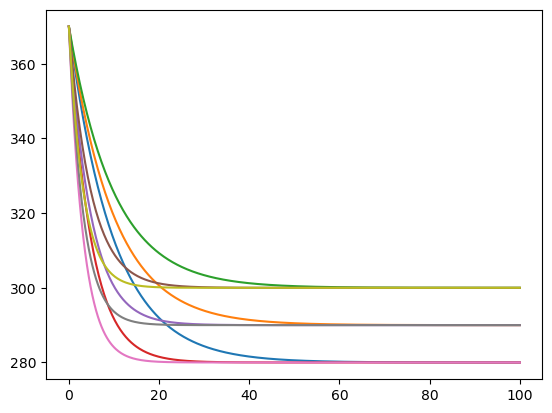

In [5]:
t = np.linspace(0, 100, 500)

for alpha in (0.1, 0.2, 0.3):
    for Te in (280, 290, 300):
        X = solve_ode(model(alpha, Te), 370, t)
        plt.plot(t, X)

plt.show()

In [6]:
alpha = 5/60
T0 = 373
Te = 293

T_mid = (T0 + Te) / 2

t = np.linspace(0, 100, 2001)
X = solve_ode(model(alpha, Te), T0, t)

T_mid

333.0

In [7]:
idx = np.argmax(X<T_mid)
t_Tmid = t[idx]
t_Tmid

np.float64(8.35)

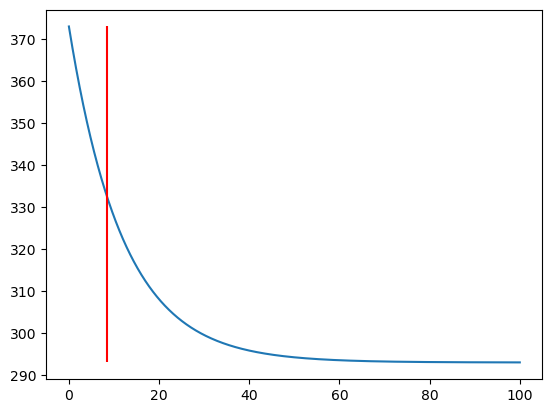

In [8]:
plt.plot(t, X)
plt.vlines([t_Tmid], 293, 373, 'r')

$$
    T_{mid} = \frac{T_e + T_0}{2}
$$
$$
    T(t) = T_0 + (T_0 - T_e) e^{-\alpha t} \\
    \frac{T_0+T_e}{2} = T_0 + (T_e - T_0) e^{-\alpha t} \\
    \frac{T_0+T_e}{2} - T_0 = (T_e - T_0) e^{-\alpha t} \\
    \frac{T_e - T_0}{2 (T_e - T_0)} = e^{-\alpha t} \\
    \frac{1}{2} = e^{-\alpha t} \\ \\
    \ln \left(\frac{1}{2}\right) = -\alpha t \\
    t = \frac{\ln 2}{\alpha}
$$

In [9]:
np.log(2)/(5/60)

np.float64(8.317766166719345)

In [10]:
5/60

0.08333333333333333

## Ejercicio 2

Supóngase una cooperativa que dispone de una nave donde acumula cantidades de un solo producto para abastecer a sus asociados cuando lo requieran. El procedimiento de abastacimiento y reposición es el siguiente. La cooperativa fija un volumen de $\bar{K}$ unidades de producto como la cantidad deseada a mantener en stock. Cada semana $t$, la cooperativa compara el volumen actual de stock $K(t)$ con el deseado, cancela los pedidos que no han llegado hasta ese momento y pide/devuelve las unidades del producto que le faltan/sobran. El producto llega a una tasa $0 \leq \alpha \leq 1$ semanal del total de pedidos pendientes. 

Por otro lado, cada semana recibe una petición fija por parte de sus asociados de $A$ unidades de producto. Se asume una situación inicial de $\bar{K}$ unidades en stock. 

**(a)** Plantear el modelo diferencial que explique la evolución del inventario de la cooperativa. Resolverlo analíticamente. 

**(b)** Estimar el stock de la cooperativa a largo plazo para distintos valores de  los parámetros. 

**(c)** Proponer una nueva forma de reponer el producto para que mantenga un stock deseado lo más cercano a $\bar{K}$ unidades.

In [13]:
def model(alpha, k_bar, sales):
    def f(k):
        return alpha * (k_bar - k) - sales
    return f

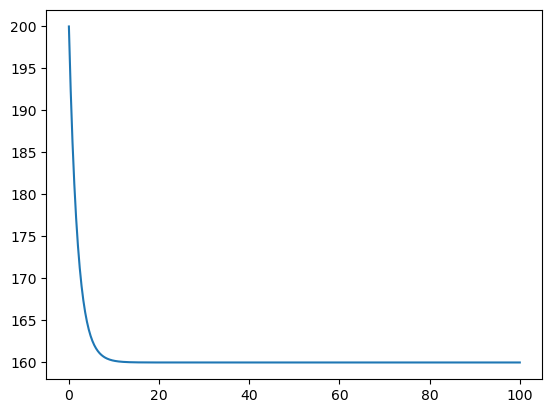

In [14]:
t = np.linspace(0, 100, 500)

k_bar = 200

sales = 20

alpha = 0.5

X = solve_ode(model(alpha, k_bar, sales), k_bar, t)

plt.plot(t, X)

$$
    \dot{K} = \alpha \left( \bar{K} - K \right) - A \\
    \dot{K} = \alpha \bar{K} - A - \alpha K \\
    K^\star = \frac{\alpha \bar{K} -A}{\alpha} \\
    K(t) = \left(K_0  - \frac{\alpha\bar{K}-A}{\alpha}\right) e^{-\alpha t} + \frac{\alpha \bar{K} - A}{\alpha}
$$

en el limite se obtiene el equilibrio

$$
    \lim_{t \rightarrow \infty} K(t) = \frac{\alpha \bar{K} -A}{\alpha} = \bar{K} - \frac{A}{\alpha}
$$

hace falta que el limite sea $\bar{K}$, pero actualmente le falta un valor de $\frac{A}{\alpha}$ al mes, el equilibrio depende de $K^\star$, con lo que se modifica para que sea exactamente $\bar{K}$

$$
    K^\star = \frac{\alpha\bar{K} - A}{\alpha} = \bar{K} - \frac{A}{\alpha}
$$

con lo que pedir extra $\frac{A}{\alpha}$ basta para que tenga equilibrio

$$
    \dot{K} = \alpha\left(\bar{K} - K + \frac{A}{\alpha}\right) - A

In [15]:
def model2(alpha, k_bar, sales):
    def f(k):
        return alpha * (k_bar - k + sales/alpha) - sales
    return f

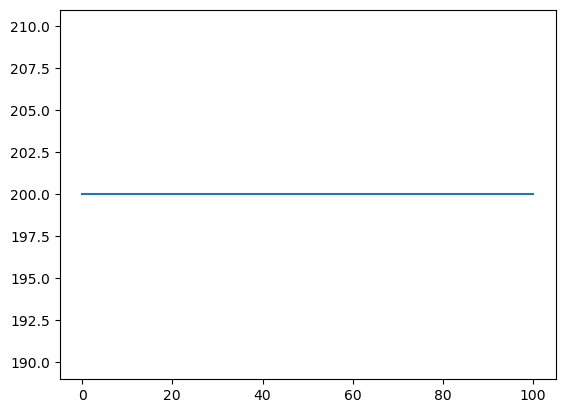

In [17]:
X2 = solve_ode(model2(alpha, k_bar, sales), k_bar, t)

plt.plot(t, X2)